# K-means clustering

## import library

In [338]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [339]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))
print(feature.shape)

number of data : 1000
number of feature : 2
(1000, 2)


## plot the input data

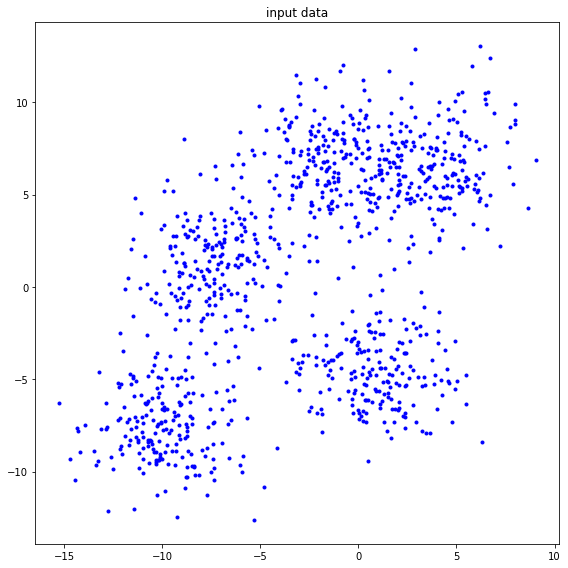

In [340]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x, y, '.', color = 'blue')

plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [341]:
def compute_distance(feature, center):
    
    n = len(feature)
    distance = []
    
    for i in range (n):
        sum = (center[0] - feature[i,0])**2 + (center[1] - feature[i,1])**2
        dis = np.sqrt(sum)
        distance.append(dis)
        
    distance = np.array(distance)
        
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [342]:
def compute_centroid(feature, label_feature, value_label):
    
    n = len(feature)
    sum_x = 0
    sum_y = 0
    cluster_size = 0
    
    for i in range(n):
        if label_feature[i] == value_label:
            sum_x += feature[i,0]
            sum_y += feature[i,1]
            cluster_size += 1
    
    if cluster_size == 0:
        centroid_x = sum_x 
        centroid_y = sum_y
    else:
        centroid_x = sum_x / cluster_size
        centroid_y = sum_y / cluster_size
    
    centroid = np.array([centroid_x, centroid_y])
    
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [343]:
def compute_label(distance):
    
    n = len(distance)
    index_label_feature = []
    
    for i in range(n):
        cluster = np.argmin(distance[i,:])
        index_label_feature.append(cluster)
    
    index_label_feature = np.array(index_label_feature)
    
    return index_label_feature


## compute lose

In [474]:
def compute_loss(feature, label_feature, centroid):
    
    loss = 0;
    
    n = len(feature)
    k = len(label_feature)
    
    for i in range(k):
        select_point = []
        for j in range(n):
            if label_feature[j] == i:
                select_point.append(feature[j])
        
        select_point = np.array(select_point)
        
        if len(select_point):
            A_centroid = np.tile(centroid[i], (len(select_point), 1))
            S_distance = np.sum(np.square(select_point - A_centroid))
                                
        loss += S_distance
                                
    loss /= n
   
    return loss

In [475]:
number_cluster1      = 5
number_iteration1    = 100
number_cluster2      = 10
number_iteration2    = 100

In [477]:
distance1            = np.zeros(shape=(number_data, number_cluster1))
centroid1            = np.zeros(shape=(number_cluster1, number_feature))
loss_iteration1      = np.zeros(shape=(number_iteration1, 1))
centroid_iteration1  = np.zeros(shape=(number_iteration1, number_cluster1, number_feature))

label_feature1 = np.zeros(shape=(number_data, 1))
label_cluster1 = [i for i in range(number_cluster1)]

print(label_feature1.shape)

for i in range(number_cluster1):
    centroid1[i][0] = -2
    centroid1[i][1] = 0

print(centroid1)

for i in range(number_iteration1):
    
    centroid_iteration1[i] = centroid1
    
    for k in range(number_cluster1):
        distance1[:,k] = compute_distance(feature, centroid1[k])
        
    if i == 0:
        for j in range(number_data):
            label_feature1[j] = np.random.randint(number_cluster1)
    else:
        label_feature1 = compute_label(distance1)
        
        
    for k in range(number_cluster1):
        centroid1[k, :] = compute_centroid(feature, label_feature1, k)
    
    loss_iteration1[i] = compute_loss(feature, label_feature1, centroid1)

        

print(centroid1)
    

(1000, 1)
[[-2.  0.]
 [-2.  0.]
 [-2.  0.]
 [-2.  0.]
 [-2.  0.]]
[[-7.41233674  1.30678633]
 [-9.88523991 -7.53991243]
 [ 0.86873053 -4.5026988 ]
 [-1.56287995  6.77894109]
 [ 4.0275665   6.58339492]]


In [478]:
distance2            = np.zeros(shape=(number_data, number_cluster2))
centroid2            = np.zeros(shape=(number_cluster2, number_feature))
loss_iteration2      = np.zeros(shape=(number_iteration2, 1))
centroid_iteration2  = np.zeros(shape=(number_iteration2, number_cluster2, number_feature))

label_feature2 = np.zeros(shape=(number_data, 1))
label_cluster2 = [i for i in range(number_cluster2)]

print(label_feature2.shape)

for i in range(number_cluster2):
    centroid2[i][0] = -2
    centroid2[i][1] = 0

print(centroid2)

for i in range(number_iteration2):
    
    centroid_iteration2[i] = centroid2
    
    for k in range(number_cluster2):
        distance2[:,k] = compute_distance(feature, centroid2[k])
        
    if i == 0:
        for j in range(number_data):
            label_feature2[j] = np.random.randint(number_cluster2)
    else:
        label_feature2 = compute_label(distance2)
        
        
    for k in range(number_cluster2):
        centroid2[k, :] = compute_centroid(feature, label_feature2, k)
    
    
    loss_iteration2[i] = compute_loss(feature, label_feature2, centroid2)
        

print(centroid2)
    

(1000, 1)
[[-2.  0.]
 [-2.  0.]
 [-2.  0.]
 [-2.  0.]
 [-2.  0.]
 [-2.  0.]
 [-2.  0.]
 [-2.  0.]
 [-2.  0.]
 [-2.  0.]]
[[  4.69496786   7.26677447]
 [  3.3577692   -4.00218622]
 [ -5.86487561   1.28531346]
 [  0.76017791  -6.19564729]
 [ -8.95594824   1.83282598]
 [ -2.09210913   7.45280376]
 [ -9.62598372  -5.00913934]
 [  1.42687973   4.89818075]
 [ -1.00722265  -3.25312052]
 [-10.0016246   -8.70298158]]


## plot the results

In [479]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    
    plt.plot(feature[:,0], feature[:,1], '.', color = 'blue')

    plt.tight_layout()
    plt.show()

In [480]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    
    plt.plot(loss_iteration, '-', color = 'red')
    
    plt.tight_layout()
    plt.show()

In [481]:
def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    k = len(centroid_iteration[0])
    n_iteration = len(centroid_iteration)
    
    plt.plot(centroid_iteration[0,:,0], centroid_iteration[0,:,1], 'o', color = 'blue')
    plt.plot(centroid_iteration[n_iteration-1,:,0], centroid_iteration[n_iteration-1,:,1], 'o', color = 'red')
    
    for i in range(k):
        plt.plot(centroid_iteration[:, i, 0], centroid_iteration[:,i,1], '-')
    
    
    plt.tight_layout()
    plt.show()

In [482]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    
    plt.scatter(feature[:,0], feature[:,1], c=label_feature, cmap = plt.cm.rainbow) 
   
   
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

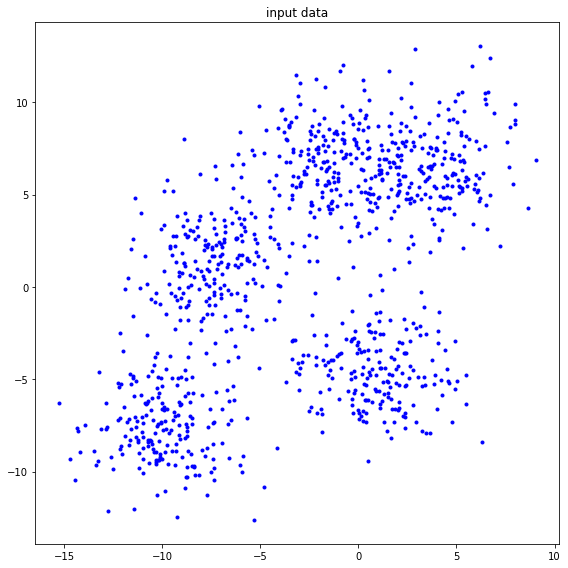

In [483]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

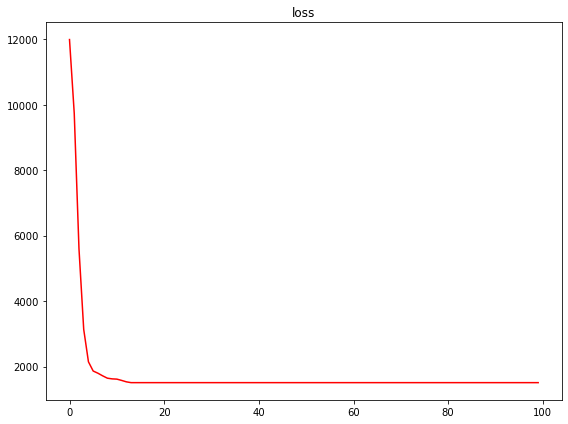

In [484]:
plot_loss_curve(loss_iteration1)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

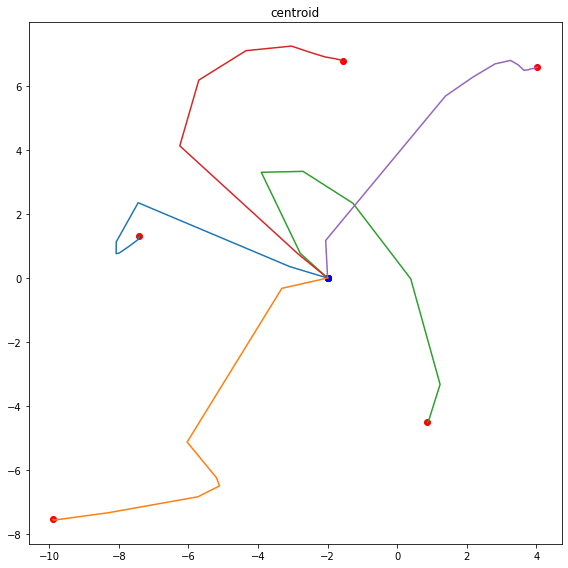

In [485]:
plot_centroid(centroid_iteration1)

***

4. plot the final clustering result with the number of clusters being 5

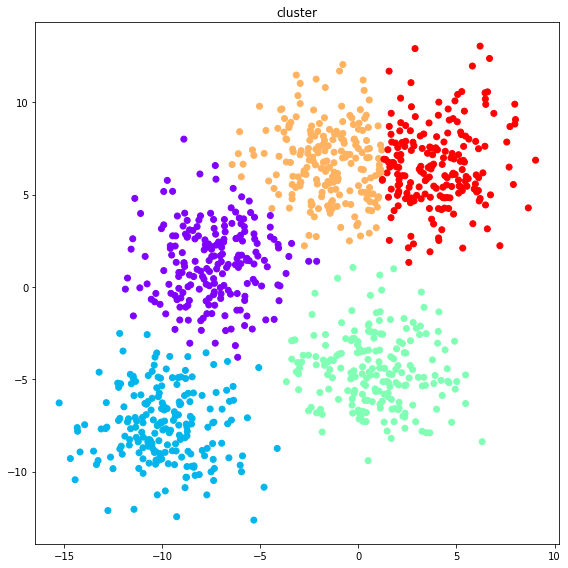

In [486]:
plot_cluster(feature, label_feature1, label_cluster1)

***

5. plot the loss over the iterations with the number of clusters being 10

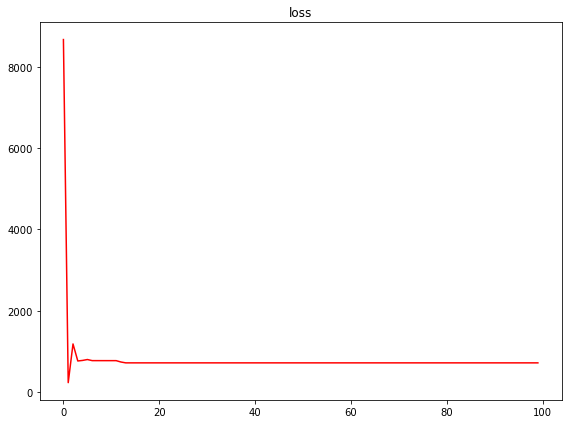

In [487]:
plot_loss_curve(loss_iteration2)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

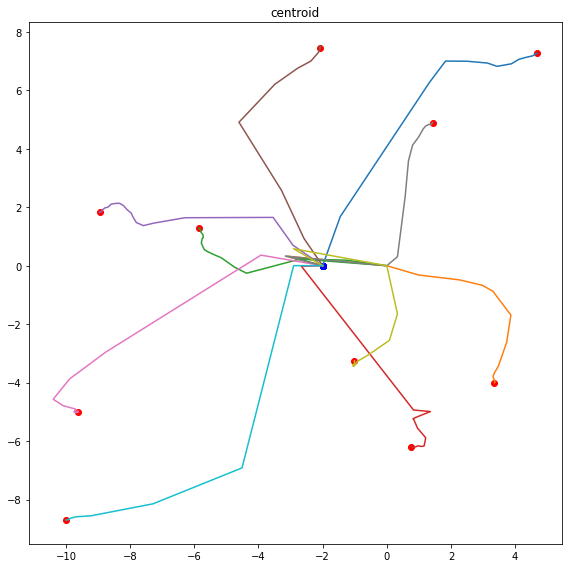

In [488]:
plot_centroid(centroid_iteration2)

***

7. plot the final clustering result with the number of clusters being 10

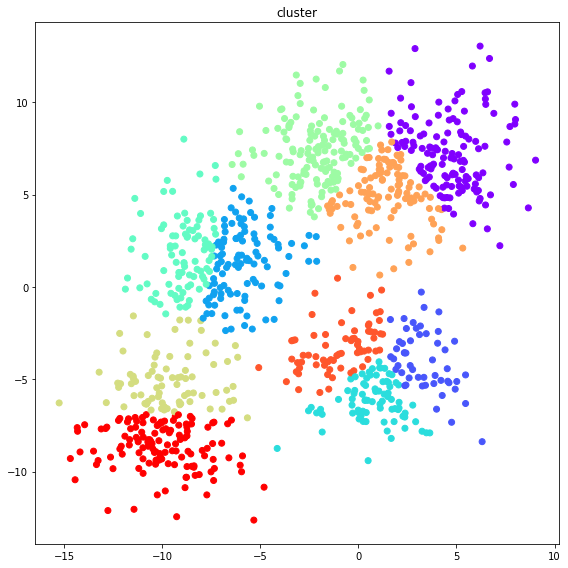

In [489]:
plot_cluster(feature, label_feature2, label_cluster2)